#Task 1: Data overview

At the beginning, we will load all necessary packages:

In [94]:
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import plotly.express as px
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

Now we will read the data file. I loaded it from my computer, so you need to upload the file from your device:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving earnings.csv to earnings.csv


In [ ]:
data = pd.read_csv('earnings.csv', sep=';', dtype={'Code': 'str'})
print(data.head())
print('Size of the data:',data.shape)
print('Number of missing values:', data.isna().sum().sum())

       id      base   bonus  overtime_pay    other  sector  section_07  sex  \
0  192064  26651.53     0.0          0.00     0.00       1           3    2   
1   25495  40168.50  1500.0          0.00  3414.32       1           2    1   
2  142164  20134.80     0.0          0.00  1700.41       1           2    2   
3  198034  16475.00     0.0          0.00  1305.00       1           2    2   
4  144990  34797.60     0.0       1893.35  3118.73       1           2    2   

   education  contract  age  duration_total  duration_entity  \
0          4         1   49           33.03             7.06   
1          1         1   36           10.07             6.01   
2          4         1   52           28.08            19.05   
3          5         1   55           35.07            11.01   
4          2         1   50           27.00            19.01   

   duration_nominal  duration_overtime  
0           1524.15                0.0  
1           1562.40                0.0  
2           1816.

As you can see, we have 11000 observations and 15 variables of various types, for example: sex (dichotomous), age (positive discrete), education (ordinal) and NACE section (nominal). The duartion parameters are quantitive (first two discrete, third continuus and the last one interval). There are no missing values.

In [ ]:
print("Base - mean:", data["base"].mean())
print("Base - standard deviation:", data["base"].std())
print("Overtime:", np.sum(data.overtime_pay>0)/data.count()[0])
print("Age - mean:", data["age"].mean())
print("Sectors:")
print(data.groupby(["section_07","sex"])["id"].count())

Base - mean: 33376.738064545454
Base - standard deviation: 19276.551637888646
Overtime: 0.34154545454545454
Age - mean: 42.47018181818182
Sectors:
section_07  sex
1           1       735
            2      1666
2           1      1490
            2      4377
3           1       486
            2      2246
Name: id, dtype: int64


The mean base salary is about 33 thousand, but the dispertion of the values is big. An average employee is 42 years old. The biggest group in our data are women from education sector. Most of people don't work overtime.

##Data distribution
The distribution of the base salary is not normal, becouse some group of people have enormous income. You can see it on the qqplot below. High values makes the histogram right skewed, which is shown on the second plot.

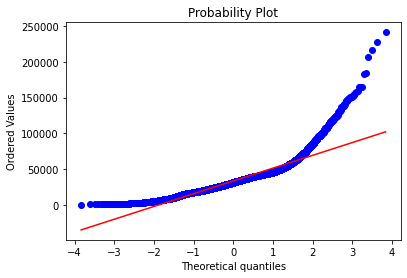

In [ ]:
stats.probplot(data["base"], dist="norm", plot=pylab)
pylab.show()

In [ ]:
fig1 = px.histogram(data, x="base")
fig1.show()

Now let's focus on "duration nominal", which means the time actually worked. As you can see below on the empirical cumulative distribution function plot, we can devide people into 3 groups: those who worked 500 hours or less, around 1000 hours, and small category of people who worked more than 1800 hours.

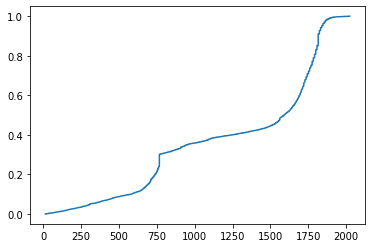

In [ ]:
ecdf = ECDF(data["duration_nominal"])
plt.plot(ecdf.x,ecdf.y)

Q-Q plot below shows that distribution of total duration of employment is close to normal, but of course this values can't be negative:

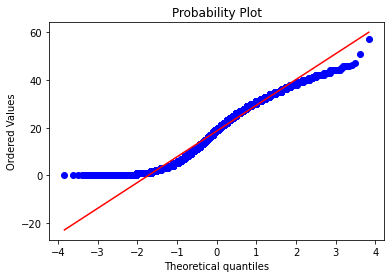

In [ ]:
stats.probplot(data["duration_total"], dist="norm", plot=pylab)
pylab.show()

#Task 2
I will start this task with discussing Pearson correlation coefficient for all variables:

In [ ]:
data.corr()

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
id,1.000000,-0.006084,0.003608,-0.005649,-0.002590,-0.000335,0.001462,-0.002195,0.009078,0.008291,-0.008010,-0.010163,-0.013450,-0.000505,-0.006988
base,-0.006084,1.000000,0.211216,0.184220,0.370515,-0.030585,-0.161944,-0.100286,-0.334013,-0.267274,0.233965,0.248362,0.272979,0.274528,0.163426
bonus,0.003608,0.211216,1.000000,-0.054103,0.050197,0.003835,-0.143938,-0.068000,0.006346,-0.095318,0.059364,0.074788,0.033600,0.237138,-0.077111
overtime_pay,-0.005649,0.184220,-0.054103,1.000000,0.104176,-0.053156,0.084267,-0.051895,-0.197116,-0.042420,0.007436,-0.004601,0.054860,-0.154939,0.865363
other,-0.002590,0.370515,0.050197,0.104176,1.000000,-0.073867,-0.239282,-0.107094,-0.258311,-0.080858,0.122036,0.095526,0.124563,0.025624,0.115349
sector,-0.000335,-0.030585,0.003835,-0.053156,-0.073867,1.000000,0.174750,0.019552,0.016593,0.089315,-0.022347,-0.046569,-0.113387,0.085523,-0.077013
section_07,0.001462,-0.161944,-0.143938,0.084267,-0.239282,0.174750,1.000000,0.102185,0.158688,0.085262,0.044459,0.044291,0.059089,-0.051241,0.083051
sex,-0.002195,-0.100286,-0.068000,-0.051895,-0.107094,0.019552,0.102185,1.000000,0.044858,-0.047051,-0.065326,-0.006440,0.064238,-0.013963,-0.047488
education,0.009078,-0.334013,0.006346,-0.197116,-0.258311,0.016593,0.158688,0.044858,1.000000,-0.089540,0.262583,0.302877,0.123246,0.380781,-0.235190
contract,0.008291,-0.267274,-0.095318,-0.042420,-0.080858,0.089315,0.085262,-0.047051,-0.089540,1.000000,-0.255781,-0.341044,-0.374163,-0.235427,-0.058223


There are two high values among this coefficients: correlation between time worked overtime and salary for overtime and between age and total duration of employment. This linear correlations seems obvious, becouse the more time you spend in job, the more money you get, also the older you are the more work experiance you have. I will calculate test statistics for these variables and check their significance.

In [ ]:
def t_stat(p):
  return p*np.sqrt(10998/(1-p**2))

print(t_stat(data["overtime_pay"].corr(data["duration_overtime"])))
print(t_stat(data["age"].corr(data["duration_total"])))

181.08825891848258
190.64676702407255


In [ ]:
print("Confidence interval for t(10998)")
print(stats.t(df=10998).ppf((0.025, 0.975)))

Confidence interval for t(10998)
[-1.96017971  1.96017971]


Test statistics definitely are in the critical region, so we can assume that there are linear correlations between variables.

Now I will look at the qualitative variables. I want to check whether there is a correlation between NACE sector and educational level. I will use chi-squared test to do it.

In [ ]:
cross = pd.crosstab(data["section_07"],data["education"])
sum_edu = cross.sum()
sum_sec = cross.sum(axis = 1)

T = 0
for i in range(1,7):
  for j in range(1,4):
    pom = sum_edu[i]*sum_sec[j]/11000
    T+=(cross[i][j]-pom)**2/pom

print("Test statistic:",T)

Test statistic: 1760.7187359754232


In [ ]:
print(stats.chi2.ppf(0.99, 10))

23.209251158954356


Test statistic is in the critical region, so these variables are dependent. We can assume that educational level in some way has an impact on the sector of work.

#Task 3
I want to start this task by presenting my conclusion from previous exercise. I wrote that there is a linear correlation between overtime pay and overtime duration. Now we can see it on the scatter plot. I deleted 4 outliers to make the plot clear. 

In [83]:
data_filtered = data[data['overtime_pay']<120000]
px.scatter(data_filtered, x = "duration_overtime", y = "overtime_pay", title = "Correlation between time and income during overtime")

We can do similar comparision for data from standard time of work (not overtime). In this case it is harder to find linear correlation.

In [ ]:
data_filtered = data[data["base"]<100000]
px.scatter(data_filtered, x = "duration_nominal", y = "base", title = "Correlation between time worked and income during normal time of work")

It's a good idea to compare salaries between men and women. As you can see below, the medians are very close. The biggest difference concerns high values, becouse some men earn much more then the rest of the society.

In [ ]:
px.box(data, x = "sex", y="base", title = "Salaries with respect to sex")

At the end of this task, I will show shares of the NACE sections in our data. The most of interviewees works in education section.

In [ ]:
px.pie(data, names='section_07', title = "Shares of NACE sections in the data")

#Task 4
I will start with calculating CI for mean. We don't know variance, so I will use variance estimator. In this task I will assume that after normalization the mean of the data have distribution N(0,1), which is justified by central limit theorem, becouse we have 11,000 observations.

In [112]:
data_age = data["age"]
age_mean = data_age.mean()
age_std = data_age.std()*np.sqrt(10999/11000) #I needed to change normalization
print("CI for mean")
print("Left boundry:", age_mean-age_std*stats.t(df=10999).ppf(0.995)/np.sqrt(10999))
print("Left boundry:", age_mean+age_std*stats.t(df=10999).ppf(0.995)/np.sqrt(10999))

CI for mean
Left boundry: 42.22424529423357
Left boundry: 42.71611834213007


This means that we can be pretty sure that expected value of the age is between 42.22 and 42.72

In [114]:
print("CI for variance")
print("Left boundry:", 11000*age_std**2/stats.chi2.ppf(0.995, 10999))
print("Right boundry:", 11000*age_std**2/stats.chi2.ppf(0.005, 10999))

CI for variance
Left boundry: 96.84602609043311
Right boundry: 103.81334720276193


In [136]:
print("CI for median")
index1 = round(5500 - stats.norm.ppf(0.995)*np.sqrt(2750))
index2 = round(5500 + stats.norm.ppf(0.995)*np.sqrt(2750))
print("Left boundry:", data_age.sort_values().reset_index(drop=True)[index1])
print("Right boundry:", data_age.sort_values().reset_index(drop=True)[index2])

CI for median
Left boundry: 43
Right boundry: 43


Our CI for median has only one value - 43.

#Task 5
I will do test for mean for two independent samples with unknown variances, which is called Welch t-test. I will assume that data concerning base salaries comes from normal distribution, which is justified, becouse we have many observations. The null hypothesis says that the expected values of those two samples are equal, alternative that they are different.

In [144]:
data1 = data[data["sector"]==1]["base"]
data2 = data[data["sector"]==2]["base"]
print(stats.ttest_ind(data1, data2, equal_var = False))

Ttest_indResult(statistic=2.8063668168113582, pvalue=0.0052139272469212735)


P-value is equal to 0.0052 which is lower than 0.01. This means that we should reject null hypothesis, so the expected values aren't equal.

In the next point we need to compare expected values of two parameters for the same group of people, so it will be paired t-test. We assume that differences between those parameters are from normal distribution with unknown variance.\
The null hypothesis: expected value of the difference is equal 0.\
The alternative hypothesis: expected value of the difference isn't equal 0.

In [151]:
data1 = data[data["age"]<30]["duration_total"]
data2 = data[data["age"]<30]["duration_entity"]
print(stats.ttest_rel(data1, data2))

Ttest_relResult(statistic=20.347987340424076, pvalue=1.1380963469260252e-80)


Test statistic is very high and p-value is practically zero, so we reject null hypothesis and accept alternative, which means that these two parameters are not equal.

#Task 6
I will check whether the duration of work is greater in the private sector then in the public sector. I will assume that we have two samples of iid variables from normal distributions with unknown variances.\
The null hypothesis: expected values of duration of work are the same.\
The alternative hypothesis: expected value of duration of work is higher in the private sector.\
To check it I will use Welch test.

In [148]:
data1 = data[data["sector"]==1]["duration_nominal"]
data2 = data[data["sector"]==2]["duration_nominal"]
print(stats.ttest_ind(data1, data2, equal_var = False))

Ttest_indResult(statistic=-11.68374191299715, pvalue=3.5442850993577654e-28)


P-value is very low (practically zero) and test statistic is negative, which means that we should reject null hypothesis and accept alternative, so employees in private sector works longer.

#Task 7
In this task I will do cluster analysis of the employees from administration section. I have chosen 4 variables: base, bonus, duration_nominal, duration_overtime. I will try to find group of people that works a lot and don't get appropriate salary. In my opinion they are most likely to start a strike.\
I couldn't do logarithm transformation on the data, becouse there are a lot of zeros in them. Instead of that, I scaled down the columns by its standard deviations and removed outliers.

In [81]:
data_adm = data[data["section_07"]==1]

In [82]:
data_adm = data_adm[["base","bonus","duration_nominal","duration_overtime"]]
data_adm = data[(data["base"]<150000) & (data["bonus"]<70000) & (data["duration_overtime"]<1510)]
data_adm_std = pd.DataFrame()
data_adm_std["base"] = data_adm["base"]/data_adm["base"].std()
data_adm_std["bonus"] = data_adm["bonus"]/data_adm["bonus"].std()
data_adm_std["duration_nominal"] = data_adm["duration_nominal"]/data_adm["duration_nominal"].std()
data_adm_std["duration_overtime"] = data_adm["duration_overtime"]/data_adm["duration_overtime"].std()

I have chosen the k-means clustering algorithm, becouse I don't want clusters to be linked. It causes that I need to determine number of clusters in advance. I will use Silhouette measure and CHI index to do it.

In [97]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10,11,12]

for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters, random_state = 0).fit(data_adm_std)
    score = silhouette_score(data_adm_std, cluster.labels_)
    print("Clusters:", n_clusters, "Score:", score)

Clusters: 3 Score: 0.38619588116682646
Clusters: 4 Score: 0.4058912086193218
Clusters: 5 Score: 0.40824328026132084
Clusters: 6 Score: 0.4135621624355751
Clusters: 7 Score: 0.4027792785290209
Clusters: 8 Score: 0.38468864729506186
Clusters: 9 Score: 0.35525619019780397
Clusters: 10 Score: 0.35780593775557096
Clusters: 11 Score: 0.3443483368079899
Clusters: 12 Score: 0.32883579975301225


In [98]:
for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters, random_state = 0).fit(data_adm_std)
    score = calinski_harabasz_score(data_adm_std, cluster.labels_)
    print("Clusters:", n_clusters, "Score:", score)

Clusters: 3 Score: 3904.5628451112475
Clusters: 4 Score: 4347.649602937112
Clusters: 5 Score: 4428.737383430308
Clusters: 6 Score: 4475.884023731902
Clusters: 7 Score: 4471.688535127277
Clusters: 8 Score: 4735.674598325081
Clusters: 9 Score: 4857.910888287032
Clusters: 10 Score: 5049.064793516439
Clusters: 11 Score: 4941.308888981442
Clusters: 12 Score: 4879.469637997287


Silhouette measure suggests that I should choose 6 clusters, but CHI index is the greatest for 10. I don't want to make too many clusters, so I will use 6.

In [99]:
clusters = KMeans(n_clusters = 6, random_state = 0).fit(data_adm_std)

In [100]:
px.scatter(data_adm_std, x = "base", y = "bonus", color = clusters.labels_, title = "Clustering shown on salaries data")

In [101]:
px.scatter(data_adm_std, x = "duration_nominal", y = "duration_overtime", color = clusters.labels_, title = "Clustering shown on work duration data")

Employees from 2nd and 4th clusters are in the best financial situation, becouse they have the greatest salaries and bonuses, so they won't start a strikes. People from 5th cluster (yellow) have very small salary, but they also work very little, so we can assume that this is only a part-time job for them. In cluster 3 there is a group of people who often stay overtime. We can't say do they have too much duties or just take optional activities to earn more money. In my opinion group 0 can start a strike, becouse they work long (sometimes stay overtime), have low salaries and no big bonuses. They are definitely the worst treated group.